# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this activity shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


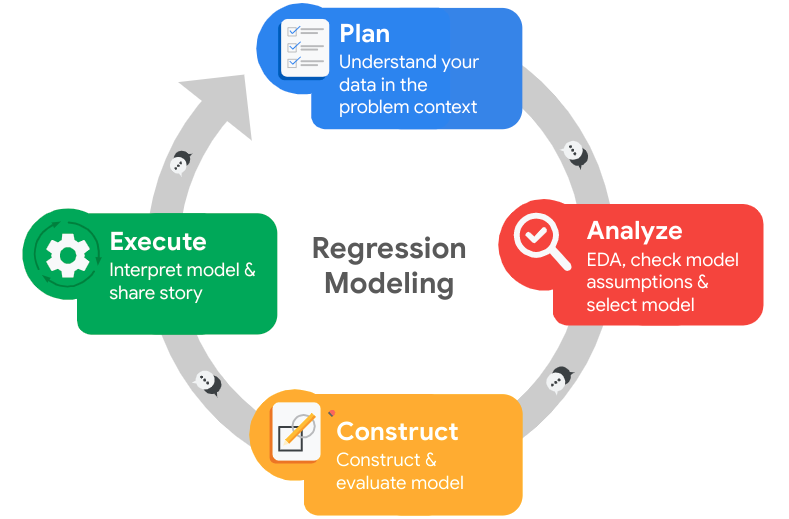

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?




1. The main stakeholder for this project is the HR department.
2. My goals for this project are to understand the factors that influence employee retention and build a prediction model to predict employee churn.
3. There were no missing values in the dataset but there were a number of duplicates in the dataset. These needed to be filtered out prior to modeling.
4. I mostly used pandas to structure, filter, and explore the dataset.
5. At this stage, I was looking for features that might introduce bias into the model and evaluating whether building the model could have costly implications for the business or for employee satisfaction.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [4]:
# DATA STRUCTURING AND HANDLING
import pandas as pd
import numpy as np
from scipy import stats
import pickle

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# MODELING
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
df = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                              'time_spend_company':'tenure',
                              'number_project':'number_projects',
                              'Work_accident':'work_accident',
                              'Department':'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
df[df.duplicated(keep=False)].sort_values(by=['satisfaction_level', 'last_evaluation', 'average_monthly_hours'])

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df[~df.duplicated(keep='first')]
print(df.shape)

# Display first few rows of new dataframe as needed
df.head()

(11991, 10)


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

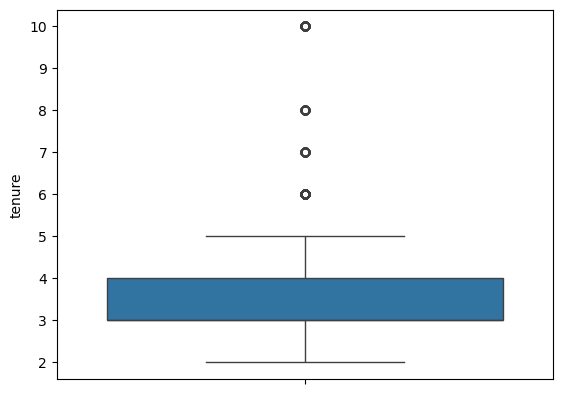

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df['tenure'])
plt.show()


In [15]:
# Determine the number of rows containing outliers
ave = df['tenure'].mean()
sd = df['tenure'].std()
outliers = df[df['tenure'] > ave+3*sd]   # NOTE THAT OUTLIERS < ave+3*sd ARE NOT POSSIBLE GIVEN THE MEAN AND STANDARD DEVIATION
outliers.shape


(188, 10)

In [16]:
# Perform ordinal label encoding for salary (currently categorical with "low", "medium", and "high")
print(df['salary'].value_counts())
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})
print(df['salary'].value_counts())

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64
salary
0    5740
1    5261
2     990
Name: count, dtype: int64


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?




1. Many of the variables have a clear association with the target variable ('left'), and none of the predictor variables seem strongly correlated with the others.
2. Data types and distributions varied. Some data were roughly uniform or had a very wide normal distribution. Others were skewed. Most of the categorical variables (including the target variable) were imbalanced.
3. So far, I have converted the 'salary' to an ordinal label encoding (low=0, medium=1, and high=2). Although there were slight differences in 'department' for employees that stayed vs. churned, I may drop this variable since the effect seemed relatively small and these may need to be one-hot encoded, which would add many new predictor variables. Alternatively, I could try to simplify the categories by binning them into "low-churn" and 'high-churn' departments.
4. EDA helps reveal data distributions, key predictor variables, outliers, and features that may aid in feature engineering. This allows one to check model assumptions before building a model.
5. I predominantly used pandas, matplotlib, and seaborn to explore and visualize the variables.
6. No: the goal of this model is ultimately to improve employee retention, which would benefit both the company and the employees (assuming that changes enacted by the company are positive incentives for the employees to stay). The dataset does not include demographic information on the employees, which means the model is not explicitly making predictions based on factors such as gender, race, etc. However, it is worth keeping in mind whether these factors are indirectly included in the dataset. In a real-world scenario, these data would be interesting to explore after a model is built to ensure that the model is not biased against particular people groups.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True) *100)

left
0    10000
1     1991
Name: count, dtype: int64
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

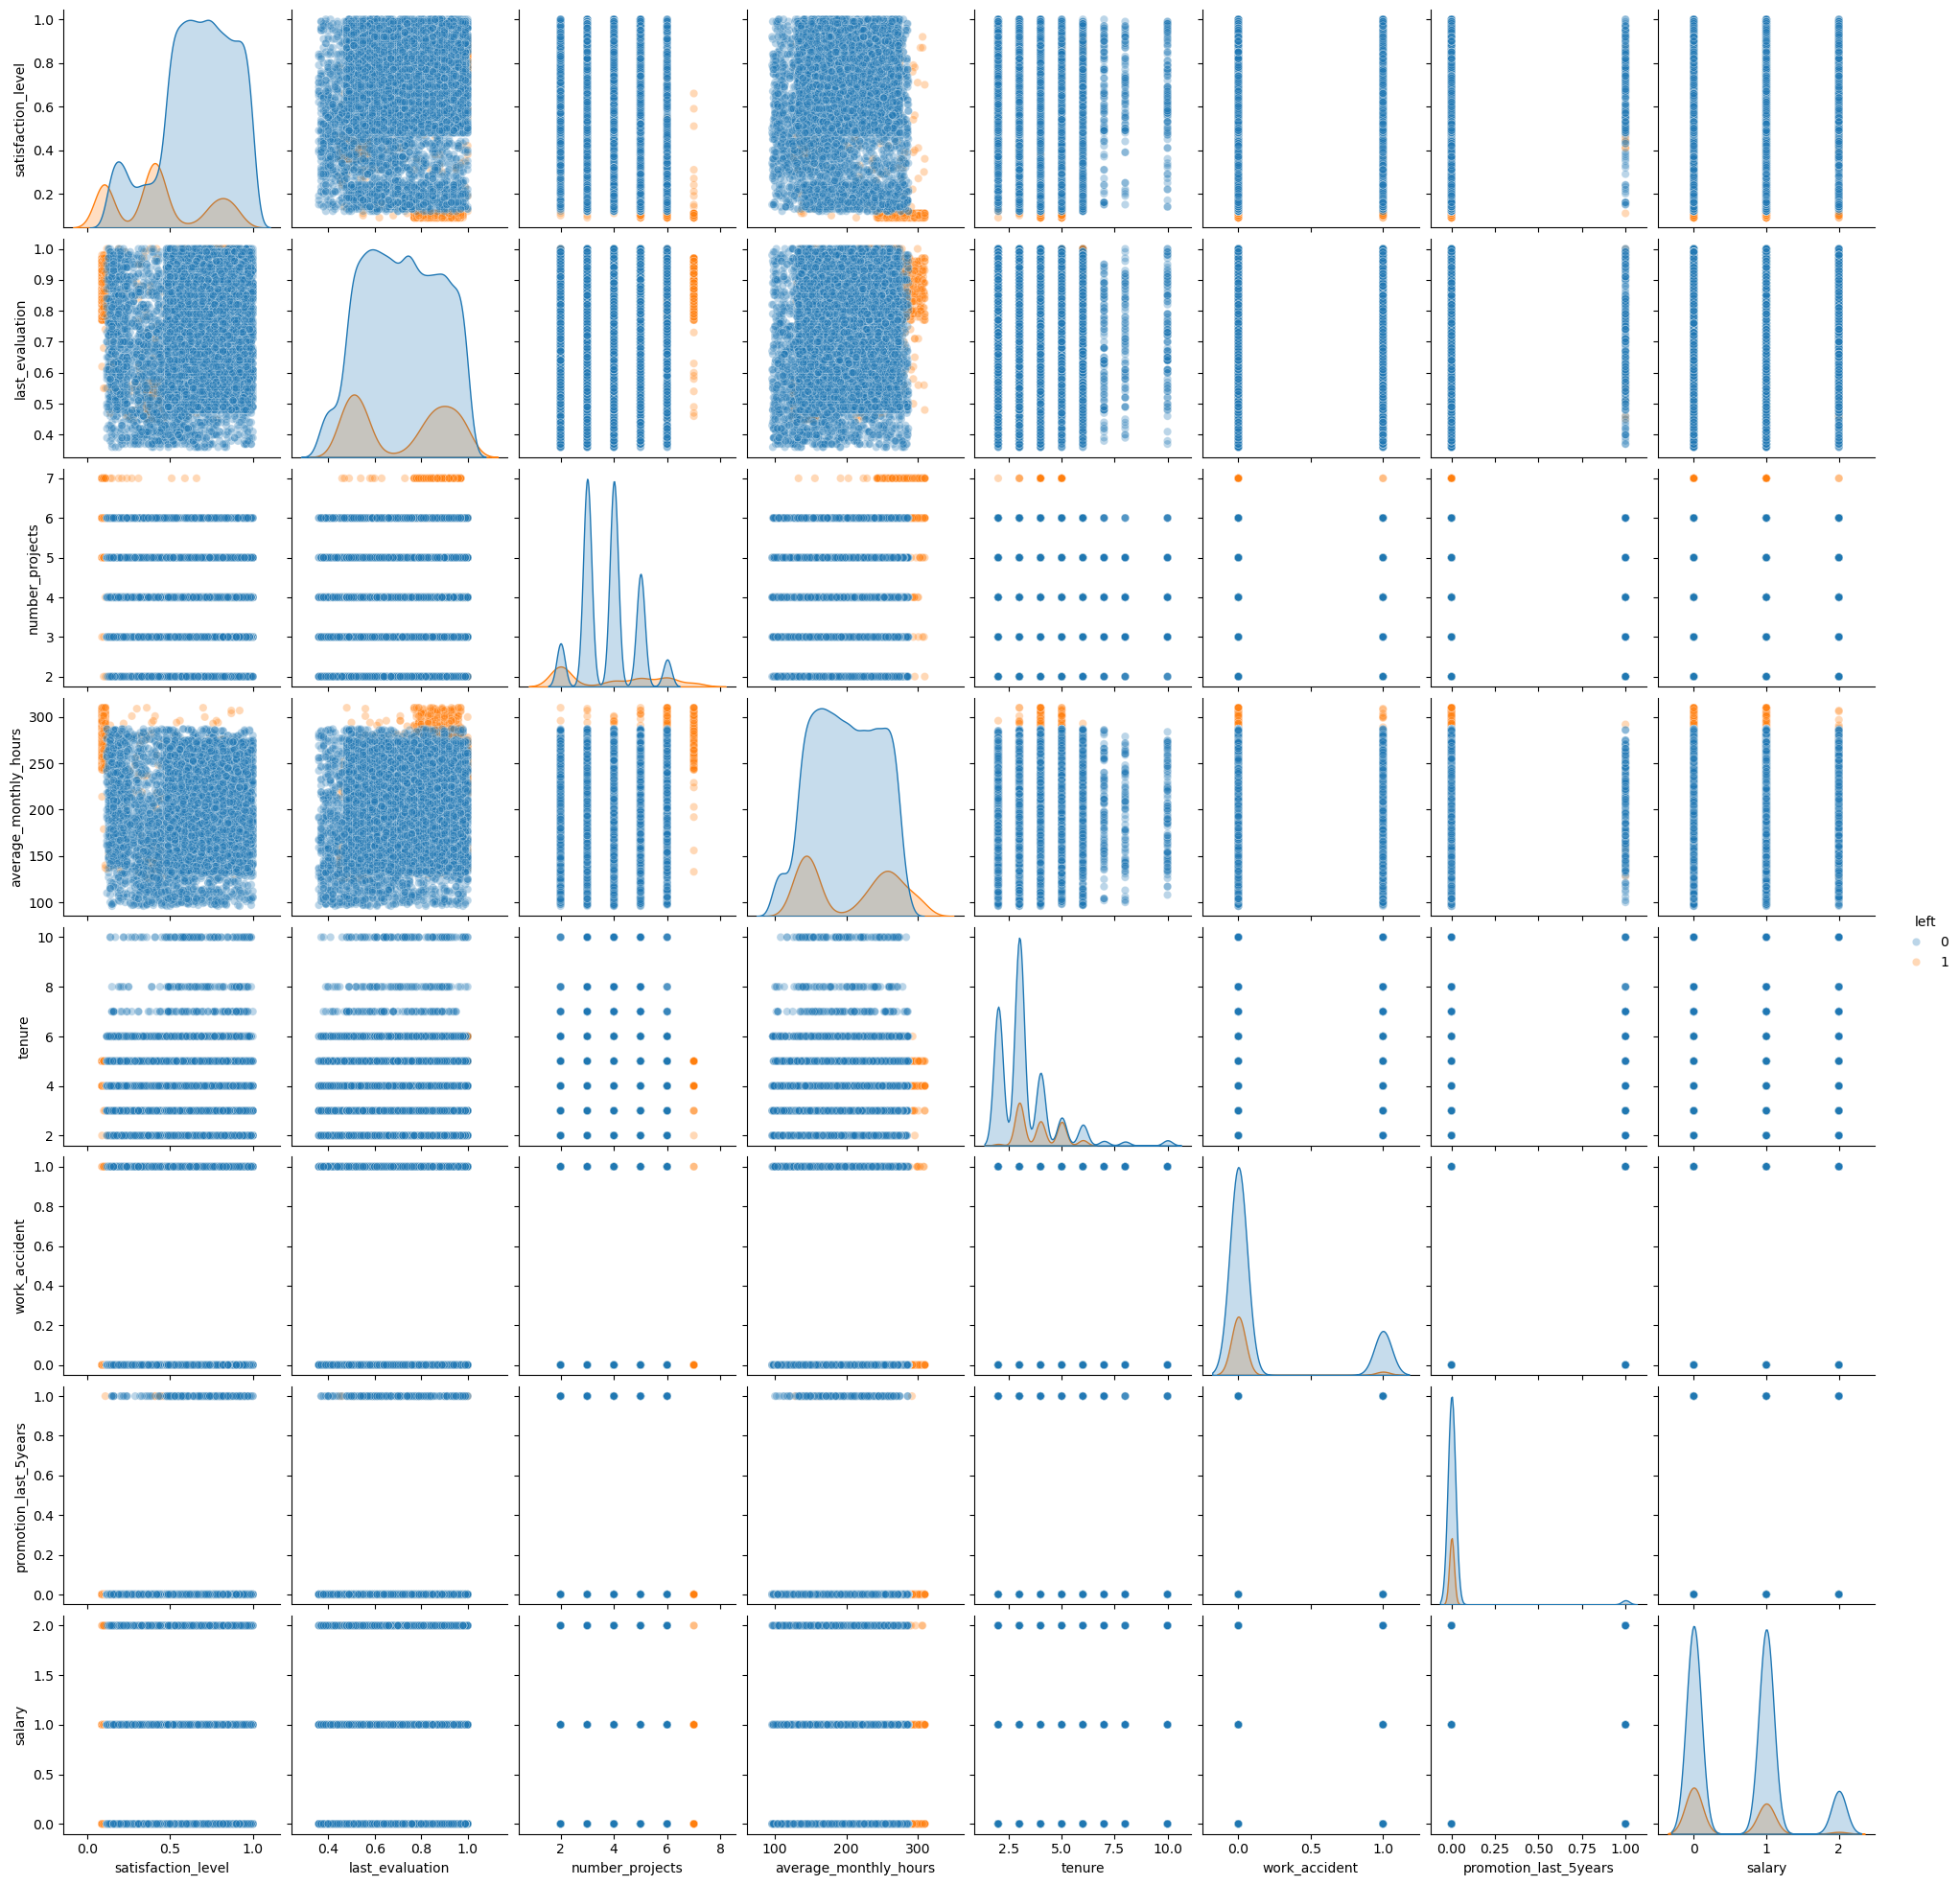

In [22]:
# INITIALLY TRY A PAIRPLOT TO LOOK AT PAIRWISE RELATIONSHIPS BETWEEN VARIABLES
sns.pairplot(df, hue='left', plot_kws={'alpha':0.3})
plt.show()

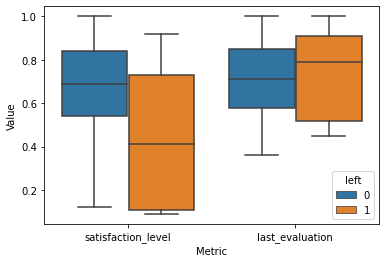

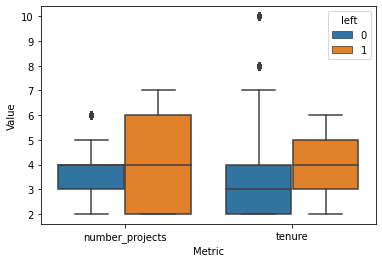

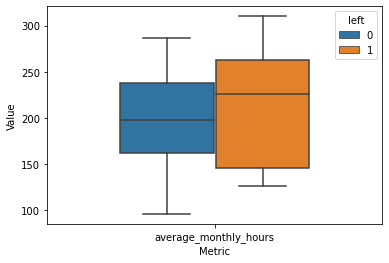

In [16]:
# MAKE SEPARATE BOXPLOTS FOR NUMERICAL METRICS WITH SIMILAR SCALES, STRATIFIED BY "left" INDICATOR.
subsets = (['satisfaction_level', 'last_evaluation'], ['number_projects', 'tenure'], ['average_monthly_hours'])
for subset in subsets:
    temp = df[subset+['left']]
    temp = pd.melt(temp, id_vars='left', var_name='Metric', value_name='Value')
    sns.boxplot(x='Metric', y='Value', data=temp, hue='left')
    plt.show()

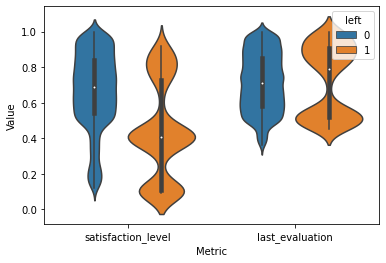

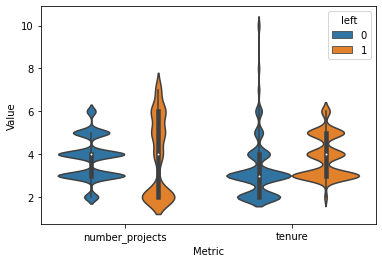

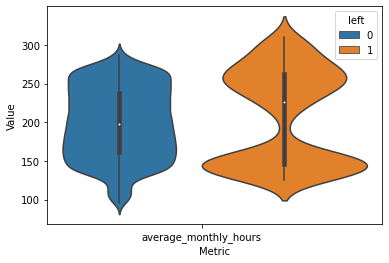

In [17]:
# MAKE SEPARATE VIOLINPLOTS FOR NUMERICAL METRICS WITH SIMILAR SCALES, STRATIFIED BY "left" INDICATOR.
subsets = (['satisfaction_level', 'last_evaluation'], ['number_projects', 'tenure'], ['average_monthly_hours'])
for subset in subsets:
    temp = df[subset+['left']]
    temp = pd.melt(temp, id_vars='left', var_name='Metric', value_name='Value')
    sns.violinplot(x='Metric', y='Value', data=temp, hue='left')
    plt.show()

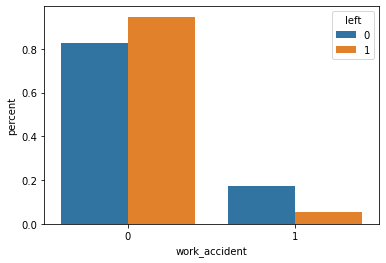

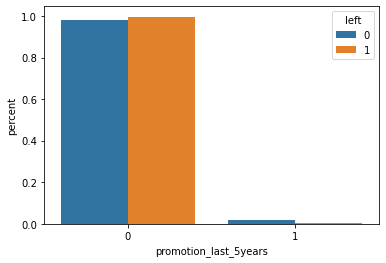

In [18]:
# MAKE SEPARATE BARPLOTS FOR CATEGORICAL METRICS ON A PERCENTAGE SCALE, STRATIFIED BY "left" INDICATOR.
columns = ['work_accident', 'promotion_last_5years']
for col in columns:
    temp = df.groupby('left')[col].value_counts(normalize=True).reset_index(name='percent')
    sns.barplot(x=col, y='percent', data=temp, hue='left')
    plt.show()

In [19]:
# Create a plot as needed
temp = df.groupby(['left']).sum()
temp

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary
left,,,,,,,,
0,6673.65,7156.67,37868,1989427,32620,1745,195,6376
1,876.58,1437.07,7732,414451,7728,105,8,865


In [20]:
print(df['department'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
[0 1 2]


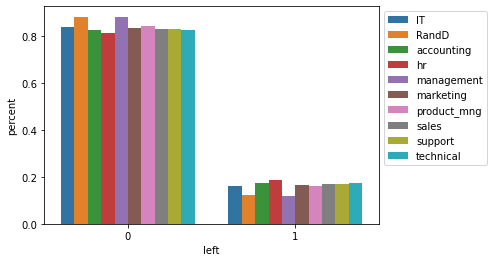

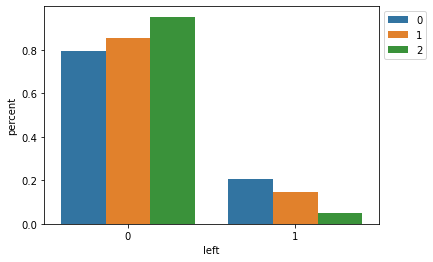

In [21]:
# MAKE SEPARATE BARPLOTS FOR MULTI-CLASS CATEGORICAL METRICS ON A PERCENTAGE SCALE, STRATIFIED BY CATEGORY INDICATOR.
columns = ['department', 'salary']
for col in columns:
    temp = df.groupby(col)['left'].value_counts(normalize=True).reset_index(name='percent')
    sns.barplot(x='left', y='percent', data=temp, hue=col)
    plt.legend(loc=2, bbox_to_anchor=(1,1))
    plt.show()

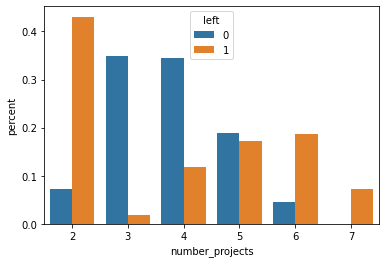

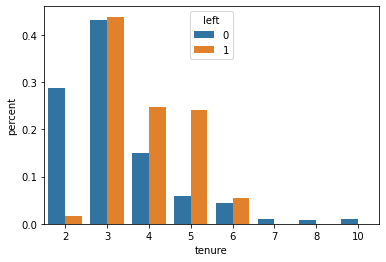

In [22]:
# BARPLOTS WITH MORE GRANULAR VIEW OF DISCRETE COUNT FEATURES
columns = ['number_projects', 'tenure']
for col in columns:
    temp = df.groupby('left')[col].value_counts(normalize=True).reset_index(name='percent')
    #print(temp)
    sns.barplot(x=col, y='percent', data=temp, hue='left')
    plt.show()

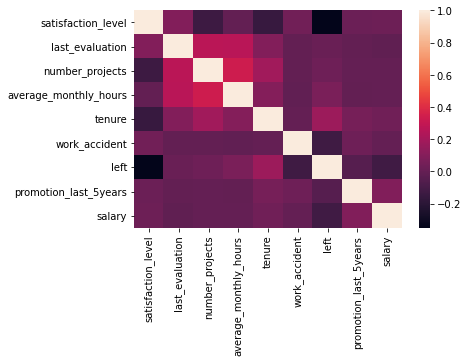

In [23]:
# PLOT CORRELATION MATRIX TO EXAMINE WHETHER ANY FEATURES ARE STRONGLY CORRELATED
matrix = df.corr()
sns.heatmap(matrix)
plt.show()

### Insights

**Below is a summary of the trends observed for each feature in the dataset from the plots above:**
1. satisfaction_level --> employees who left reported substantially lower satisfaction levels than employees who stayed.
2. last_evaluation --> employees who left had similar or slightly higher evaluation scores than employees who stayed.
3. number_projects --> employees who left appear to have a slightly higher number of projects than employees who stayed.
4. tenure --> employees who left had a longer tenure with the company than employees who stayed.
5. average_monthly_hours --> employees who left had a similar or slightly higher average monthly hours than employees who stayed.
6. work_accident --> employees who had a work accident appear to be less likely to leave than employees who did not have a work accident.
7. promotion_last_5years --> no major difference in leaving rate was observed between those promoted and those not promoted.
8. department --> leaving rate varied slightly by department: employees in the R&D and management departments had the lowest leaving rate, while employees in the HR department had the highest leaving rate.
9. salary --> a step-wise decrease in leaving rate was associated with each categorical increase in salary (negative correlation between salary and leaving rate.

**The more granular view of discrete variables revealed the following:**
1. There appears to be an optimal number of projects for employee retention. Employees with only 2 projects were associated with a very high leaving rate. Employees with 3 or 4 projects were likely to stay, but increasing projects to 5-7 was associated with a renewed increase in leaving rate.
2. There is a slight, rightward shift in the distribution of employees who left toward higher tenure with the company (i.e., employees who have been with the company longest appear to be slightly more at risk of leaving).

**The violin plots also revealed some interesting non-normal behavior specifically among employees who left for certain variables:**
1. satisfaction_level --> among employees who stayed, this variable had a left-tailed distribution that was relatively smooth. However, among employees who left, there were clusters of values at low satisfaction, medium satisfaction, and high satisfaction, with more of the values appearing at low or medium satisfaction. Therefore, satisfaction level was less continuous for employees who left.
2. last_evaluation AND average_monthly_hours --> both of these variables had similar trends. The distributions were largely continuous/unimodal for employees who stayed. For employees who left, there were clear bimodal distributions, with a cluster of values at a low end of the scale and a cluster of values at the high end of the scale.

**Therefore, the violin plots revealed characteristics of the distributions that boxplots did not show. I might be able to leverage these characteristics to engineer new categorical features using a binning strategy.**

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?



1. Some of the predictor variables had unexpected relationships with the target variable. For example, average monthly hours had a bimodal distribution specifically among employees who left, which could suggest that two subgroups exist among people who leave: those that work a lot of hours and those that work few hours. These employees may be leaving for different reasons.
2. I chose to include all predictor variables in the model except department. Department seemed to only have a weak relationship with the target variable and would have required adding a relatively large number of one-hot encoded features to the dataset. In retrospect, I also should have excluded promotion_last_5years: there was almost no apparent relationship between this variable and the target variable (from the boxplots), and it had by far the lowest feature importance in the trained model.
3. Yes, each of the assumptions of a GBM are met.
4. The model fit the data quite well (optimized F1 score of 0.94 and accuracy of 0.98).
5. Yes, the model could likely be improved. I observed a slight increase in F1 score by tuning the probability threshold used to define/label the positive class. I also explored the relationship between thresholds for improving recall at the expense of precision. Additional attempts to improve the model could include feature engineering and finer hyperparameter tuning.
6. For this stage, I mostly used scikit-learn, xgboost, and plotting libraries to evaluate and plot model performance.
7. No new ethical considerations were introduced at this stage (see previous answers).

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task with a binary outcome variable (employee churned vs. employee stayed).

### Identify the types of models most appropriate for this task.

The predictor variables include continuous, discrete, ordinal categorical, and non-ordinal categorical variables. None of the predictor variables appear to be strongly correlated with each other (meets independence assumption). Some variables have weak outliers, but it does not appear to be a major problem. There is a class imbalance in the target variable. This collection of predictor variables are suitable for logistic regression, Naive Bayes, or tree-based methods (random forest or gradient-boosted machine). I plan to try a XG Boost model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [24]:
# INSTANTIATE MODEL
xgb = XGBClassifier(objective='binary:logistic', random_state=64)

# DEFINE PARAMETER GRID
# NOTE: THIS PARAMETER GRID TOOK ~ 1HR TO FIT VIA GRIDSEARCHCV
cv_params = {'n_estimators':[20, 50, 100, 150],
            'max_depth':[3, 9, 15, 20, None],
            'min_child_weight':[1, 3, 5],
            'learning_rate':[0.1, 0.2, 0.3]
            }

# DEFINE SCORING METRICS
scoring = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']

# INSTANTIATE GRIDSEARCH
xgb_gs = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, n_jobs=3, verbose=1, refit='f1')

In [25]:
# DEFINE TRAINING (60%), VALIDATION (20%), AND TEST (20%) SETS
df_x = df.drop(['department', 'left'], axis=1)
df_y = df['left']
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=32)
X_tr, X_validation, y_tr, y_validation = train_test_split(X_train, y_train, test_size=X_test.shape[0], random_state=16)
print(X_train.shape, X_test.shape, X_tr.shape, X_validation.shape)

(9592, 8) (2399, 8) (7193, 8) (2399, 8)


In [26]:
%%time
# FIT GRIDSEARCH MODELS
# ONLY UNCOMMENT AND RE-RUN THIS IF YOU WANT TO REFIT THE GRIDSEARCH MODELS
#fit_gs = xgb_gs.fit(X_tr, y_tr, verbose=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


In [27]:
# SAVE FIT GRIDSEARCH MODEL
# ONLY UNCOMMENT AND RE-RUN THIS IF YOU HAVE FINISHED FITTING NEW GRIDSEARCH MODELS
# MIGHT ALSO WANT TO CHANGE THE FILE NAME TO SAVE DIFFERENT MODELS IN SEPARATE FILES
#pf = open('Initial_XGBoost_GridSearch_Model_EmployeeRetention.pickle', 'wb')
#pickle.dump(fit_gs, pf)
#pf.close()

# OPEN SAVED GRIDSEARCH MODEL
fit_gs = pickle.load(open('Initial_XGBoost_GridSearch_Model_EmployeeRetention.pickle', 'rb'))

In [28]:
fit_gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 1,
 'n_estimators': 150}

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Model performance was quite high even for this initial model. I could also extract feature importances, revealing which features were most useful for the model to make predictions.
2. This model could be an effective tool in identifying employees at risk of leaving. I would recommend implementing the model for a period of time while conducting/measuring the model's effects on employee retention and satisfaction.
3. I would also recommend additional investigation into the most important features in the model to better understand how these features relate to the target variable, and what actions the company may be able to take to improve employee satisfaction and retention.
4. Yes, the model could likely be improved (see answers to previous questions).
5. One interesting question to examine would be the possible profile of potentially overworked employees (those with high average monthly hours). This may be a special subgroup of employees that are achievers/high-performers but also associated with an increased risk of leaving. It may be especially valuable to the company to retain this group of people.
6. I used scikit-learn, xgboost, and data visualization libraries.
7. As the model is deployed, it is important to monitor the model performance on future outcomes of employee retention, as well as possible unintended biases that the model introduces in its predictions. Specifically, it would be important to check that the model performs well for all people groups and does not lead to preferential or biased treatment of any specific group of people.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [29]:
# GET BEST ESTIMATOR PERFORMANCE ON VALIDATION SET
best_model = fit_gs.best_estimator_
y_pred_validation = best_model.predict(X_validation)
report = classification_report(y_validation, y_pred_validation)
print(report)
print('F1 score:', f1_score(y_validation, y_pred_validation))
print('Precision:', precision_score(y_validation, y_pred_validation))
print('Recall:', recall_score(y_validation, y_pred_validation))
print('Accuracy:', accuracy_score(y_validation, y_pred_validation))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2004
           1       0.97      0.91      0.94       395

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399

F1 score: 0.9425587467362925
Precision: 0.9730458221024259
Recall: 0.9139240506329114
Accuracy: 0.9816590245935807


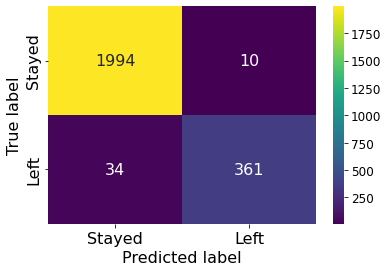

In [56]:
# PLOT CONFUSION MATRIX OF INITIAL BEST MODEL
cm = confusion_matrix(y_validation, y_pred_validation)
#disp = ConfusionMatrixDisplay(cm, display_labels=['Stayed', 'Left'])
#disp.plot(values_format='')

# PRETTY FORMATTING FOR INCLUSION IN THE EXECUTIVE SUMMARY
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16}, cmap='viridis')
plt.xticks([0.5, 1.5], labels=['Stayed', 'Left'], fontsize=16)
plt.yticks([0.5, 1.5], labels=['Stayed', 'Left'], fontsize=16)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
ax = plt.gca()
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
plt.show()

In [31]:
# PREDICT PROBABILITIES AND ISOLATE PREDICTED PROBABILITIES FOR THE POSITIVE LABEL (i.e., EMPLOYEE 'left')
y_probs_validation = fit_gs.predict_proba(X_validation)
pos_probs = [x[1] for x in y_probs_validation]
pos_probs[:10]

[0.00026518657,
 0.98593384,
 0.0038130973,
 0.0012835359,
 0.009535195,
 0.00220311,
 0.008796296,
 0.99698454,
 0.023944994,
 0.003769285]

[4.2863074e-04 4.3160084e-04 4.3324166e-04 ... 9.9972945e-01 9.9974364e-01
 9.9979156e-01]


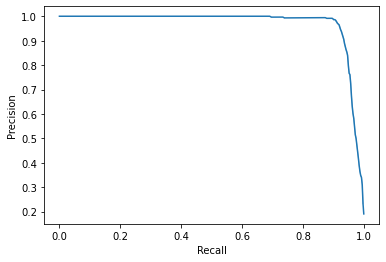

In [32]:
# PLOT PRECISION-RECALL CURVE
precision, recall, thresholds = precision_recall_curve(y_validation, pos_probs)
sns.lineplot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
print(thresholds)
plt.show()

ROC AUC: 0.9544670153364158


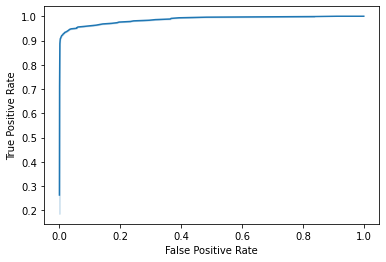

In [33]:
# PLOT ROC CURVE
fpr, tpr, thresholds = roc_curve(y_validation, pos_probs)
print('ROC AUC:', roc_auc_score(y_validation, y_pred_validation))
sns.lineplot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Best F1 score: 0.9447368421052632
Best probability threshold: 0.61


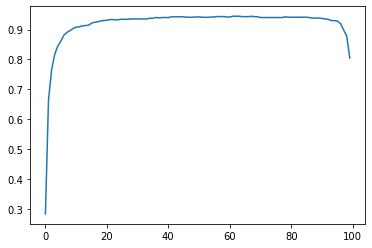

In [34]:
# FIND OPTIMAL PROBABILITY THRESHOLD TO MAXIMIZE F1 SCORE AND IMPROVE RECALL.
# MIGHT BE ESPECIALLY HELPFUL DUE TO CLASS IMBALANCE OF TARGET VARIABLE.
thresholds = np.arange(0, 1, 0.01)
best_f1_score = 0
best_threshold = -1
f1_scores = []
for threshold in thresholds:
    y_pred_labels = [0 if prob < threshold else 1 for prob in pos_probs]
    f1 = f1_score(y_validation, y_pred_labels)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
    f1_scores.append(f1)
    
print('Best F1 score:', best_f1_score)
print('Best probability threshold:', best_threshold)

plt.plot(f1_scores)
plt.show()

**Note: the probability threshold optimization did not substantially improve model performance according to the F1 score.** However, it might be possible to improve the recall without negatively affecting F1 score. Recall may be more important than precision in this case, as the company likely places higher value on identifying employees truly at risk of leaving rather than minimizing the false positives.

Best recall score: 0.9341772151898734
Precision @ best recall score: 0.9088669950738916
F1 score @ best recall score: 0.9213483146067415
Best probability threshold: 0.15


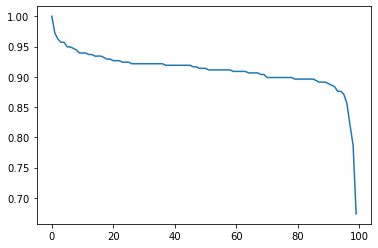

In [35]:
# FIND OPTIMAL PROBABILITY THRESHOLD TO MAXIMIZE F1 SCORE AND IMPROVE RECALL.
# MIGHT BE ESPECIALLY HELPFUL DUE TO CLASS IMBALANCE OF TARGET VARIABLE.
thresholds = np.arange(0, 1, 0.01)
min_precision = 0.90  # MINIMUM PRECISION THAT WE ARE WILLING TO ACCEPT WHILE TRYING TO IMPROVE RECALL
best_recall_score = 0
best_threshold = -1
recall_scores = []
for threshold in thresholds:
    y_pred_labels = [0 if prob < threshold else 1 for prob in pos_probs]
    recall = recall_score(y_validation, y_pred_labels)
    precision = precision_score(y_validation, y_pred_labels)
    if recall > best_recall_score and precision >= min_precision:
        best_recall_score = recall
        best_threshold = threshold
        precision_for_best_recall = precision
        f1_for_best_recall = f1_score(y_validation, y_pred_labels)
    recall_scores.append(recall)
    
print('Best recall score:', best_recall_score)
print('Precision @ best recall score:', precision_for_best_recall)
print('F1 score @ best recall score:', f1_for_best_recall)
print('Best probability threshold:', best_threshold)

plt.plot(recall_scores)
plt.show()

**It looks like recall is challenging to improve without substantially affecting precision.** This is also evident in the precision-recall curve, as there is a sharp dropoff in precision to get incremental gains in recall.

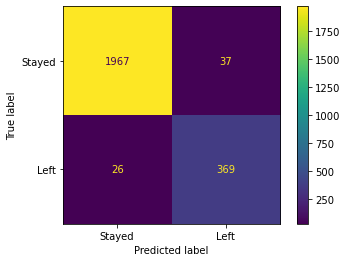

In [39]:
# CONFUSION MATRIX FOR BEST RECALL THRESHOLD
threshold = 0.15
y_pred_labels = [0 if prob < threshold else 1 for prob in pos_probs]
cm = confusion_matrix(y_validation, y_pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=['Stayed', 'Left'])
disp.plot(values_format='')

**As expected from the precision-recall analyses, capturing more true positives came at the expense of *many* more false positives.** Gaining 8 more true positives resulted in an increase of 27 false positives. This tradeoff would be worth discussing with stakeholders to see how important/costly it is to capture each additional true positive.

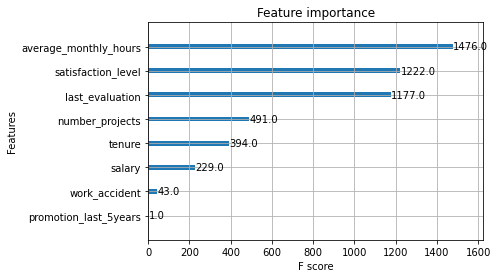

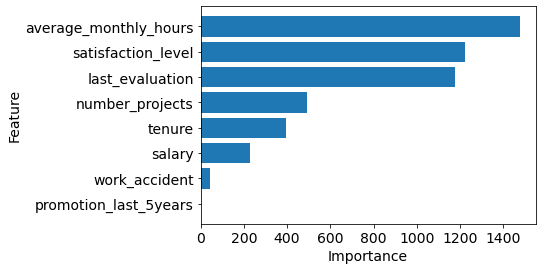

In [72]:
# GET FEATURE IMPORTANCES OF THE MODEL WITH HIGHEST F1 SCORE
#feature_importances = 
plot_importance(best_model)
plt.show()

# PRETTY PLOT FORMATTING FOR INCLUSION IN THE EXECUTIVE SUMMARY
feature_importances = best_model.get_booster().get_score()
features = feature_importances.keys()
scores = feature_importances.values()
scores, features = zip(*sorted(zip(scores, features)))
plt.barh(features, scores)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
#plt.title('Feature Importance', fontsize=16)
plt.show()


### Summary of model results

The initial optimal model had an F1 score of 0.943 and accuracy of 0.982, indicating that it was accurate in 98.2% of its predictions. The precision (0.973) indicates that when the model predicts that an employee will leave, it is very often correct. However, the recall (0.914) indicates that the model is comparatively worse at identifying all employees who are at risk of leaving. Recall can be increased by tuning the prediction threshold, but this comes at the expense of a disproportionate number of false positives.

The most important features for the model predictions were average_monthly_hours, satisfaction_level, and last_evaluation. Intuitively, an employee's satisfaction_level makes sense as a predictor of that employee's decision to leave or stay: employees that left reported an overall lower satisfaction level. Both average_monthly_hours and last_evaluation had somewhat unexpected relationships with the outcome variable: employees that left either had unusually high or unusually low values for these variables. These relationships might be worth exploring further, e.g., by deploying additional employee surveys or exit interviews. For example, it is possible that employees with very high average monthly hours are feeling burned out, while employees with very low average monthly hours are feeling understimulated or purposeless (or they may be part-time employees, who may be more likely to be searching for other employment).

### Conclusion, Recommendations, Next Steps

The model performance is very high and could help drive company decisions to improve employee retention. The feature importances for this model indicate that average monthly hours, self-reported satisfaction levels, and performance evaluation scores were the strongest predictors of employees that leave. These metrics should be investigated further to better understand their relationship with employee retention, especially since some of appear to consist of two separate groups of employees that are likely leaving the company for different reasons.

If the stakeholders would like to see if we can further improve the model, we could also try additional hyperparameter tuning, feature engineering, and alternative types of prediction models.